# 🚀 Day 28/100 of #100DaysOfCode
# 🎯 Clustering Project (Customer Segmentation)

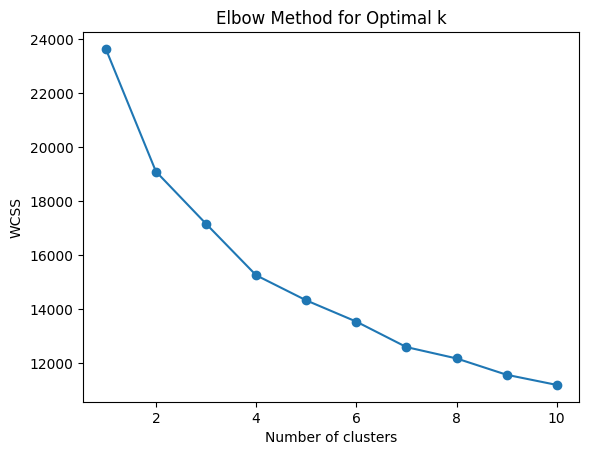

Clustering complete! Results saved as Clustered_Customers.csv


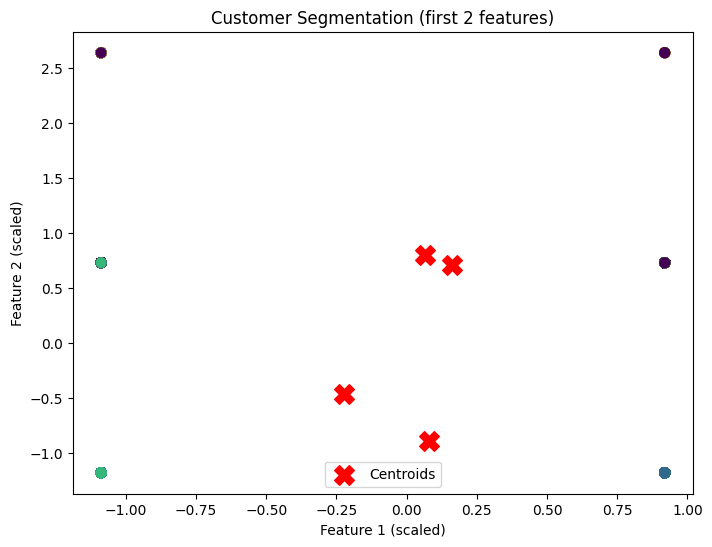

In [1]:
# 🚀 Day 28/100 of #100DaysOfCode
# 🎯 Clustering Project (Customer Segmentation)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# 1. Load dataset
df = pd.read_csv("../data/Test.csv")

# 2. Drop irrelevant columns (like ID)
df.drop("ID", axis=1, inplace=True)

# 3. Encode categorical variables
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# 4. Handle missing values if any
df.fillna(df.median(), inplace=True)

# 5. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 6. Use Elbow Method to determine optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 7. Fit KMeans with chosen k (example: k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 8. Add cluster labels to dataset
df['Cluster'] = clusters

# 9. Save results
df.to_csv("../output/Clustered_Customers.csv", index=False)
print("Clustering complete! Results saved as Clustered_Customers.csv")

# 10. Optional: Visualize first 2 dimensions of clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation (first 2 features)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()
